# Etapes du projet

*   Analyse exploratoire des données
*   Analyse en composantes principales
*   Clustering K-Means








# Analyse exploratoire des données

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from yellowbrick.cluster import KElbowVisualizer

**Description des données "Wholesale Customers"**

Contexte du Jeu de Données
Ce jeu de données provient d'un distributeur en gros et contient des informations sur les clients, notamment leurs dépenses annuelles dans différentes catégories de produits. Il peut être utilisé pour des tâches de classification et de clustering, notamment pour segmenter les clients selon leurs habitudes d’achat.







In [3]:
df = pd.read_csv('Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


**Caractéristiques des Données**

*   Type : Données multivariées
*   Domaine : Business
*   Nombre d'instances : 440 clients
*   Nombre de variables : 7
*   ÉTypes de variables : Entiers et catégoriques
*   Données manquantes : Aucune

<Axes: xlabel='Channel'>

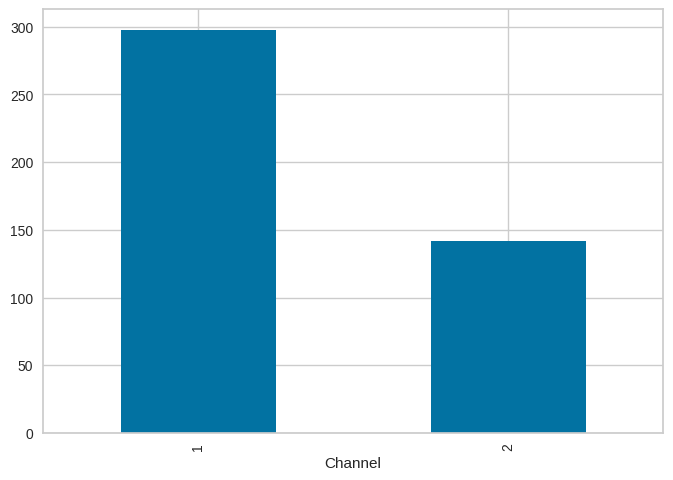

In [9]:
# Les canaux de distribution
df['Channel'].value_counts().plot(kind= 'bar')

<Axes: xlabel='Region'>

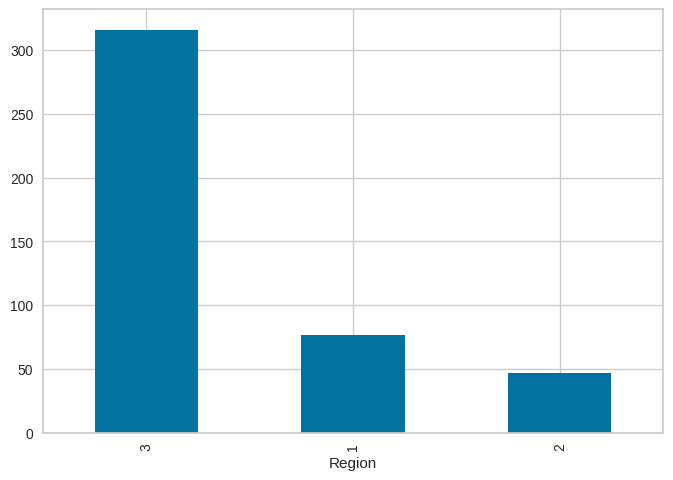

In [10]:
# Regions des clients
df['Region'].value_counts().plot(kind= 'bar')

In [11]:
df = df.rename(columns={'Delicassen': 'Delicatessen'}) # epicerie fine
df['Channel'] = df['Channel'].map({1: 'HoReCa', 2: 'Retail'})
df['Region'] = df['Region'].map({1: 'Lisbon', 2: 'Porto', 3: 'Other'})

In [12]:
# Table de frequence
df['Region'].value_counts()

,count
Region,
Other,316
Lisbon,77
Porto,47


In [13]:
# Table de frequence normalisée
df['Region'].value_counts(normalize=True)

,proportion
Region,
Other,0.718182
Lisbon,0.175000
Porto,0.106818


In [14]:
features = df.columns.tolist()
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [15]:
# Résumé statistique
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Visualisation des données**

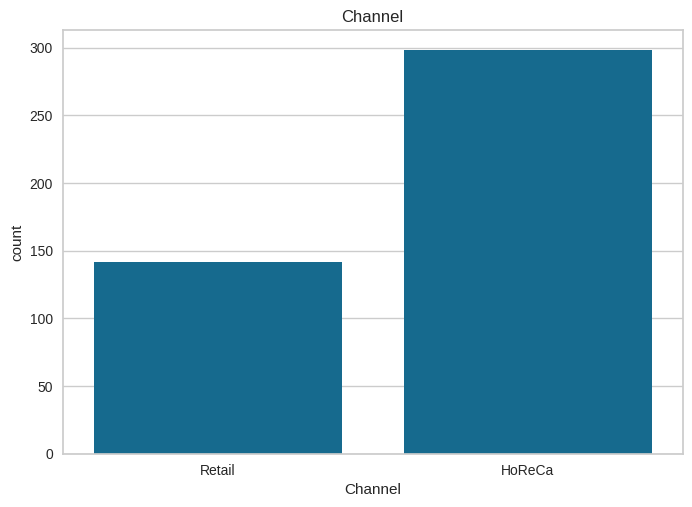

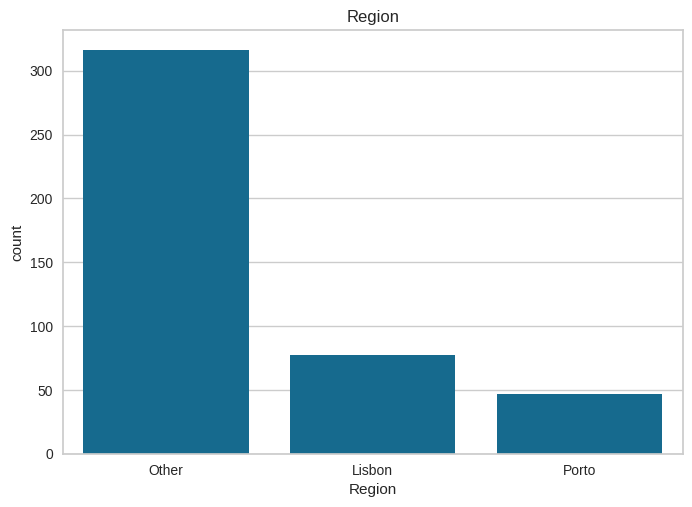

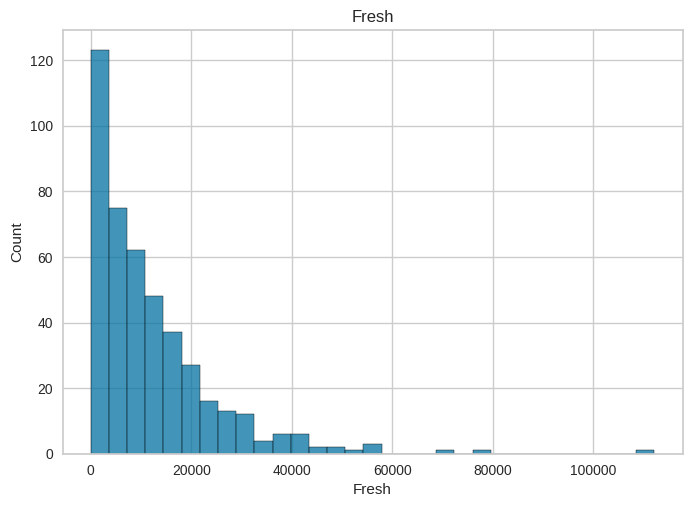

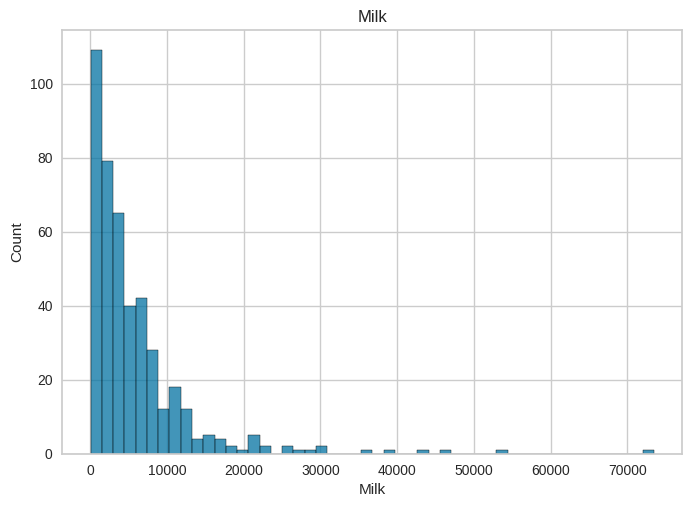

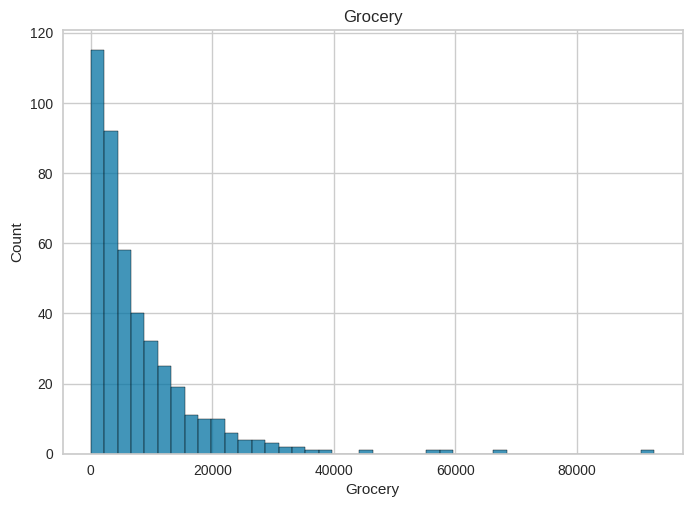

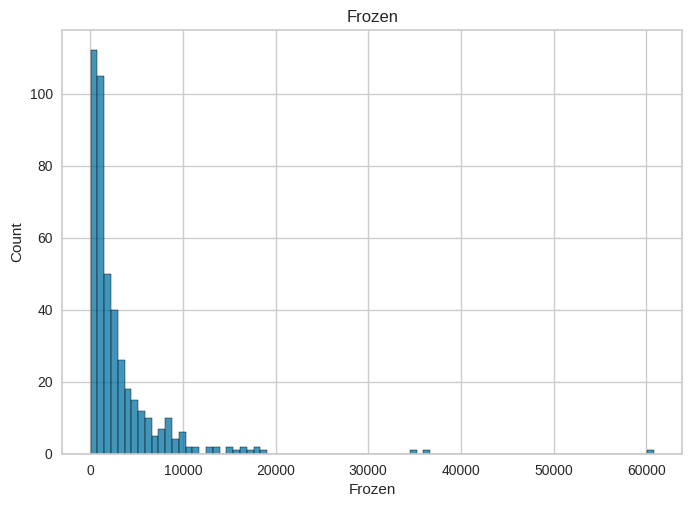

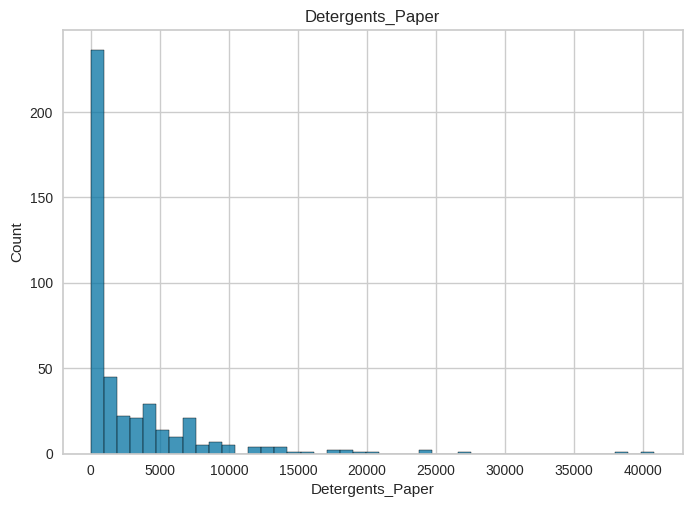

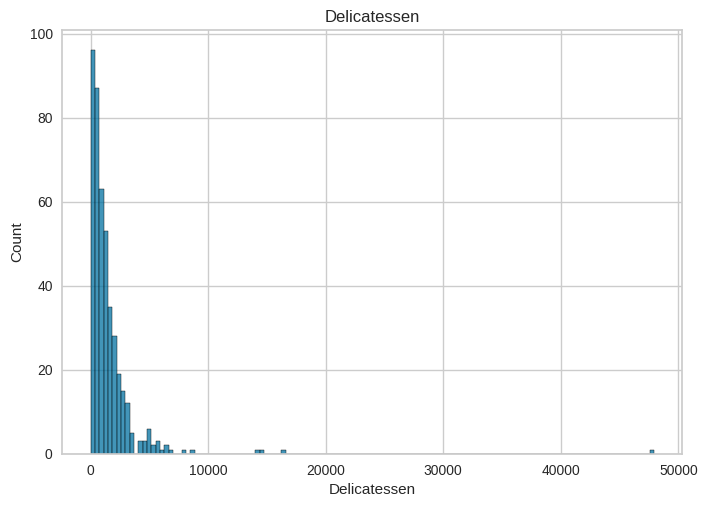

In [27]:
for feature in features:
    if (feature == 'Channel') | (feature == 'Region'):
        ax = sns.countplot(x=feature, data=df)
        ax.set_title(feature)
        plt.show()
    else:
        ax = sns.histplot(x=feature, data=df)
        ax.set_title(feature)
        plt.show()

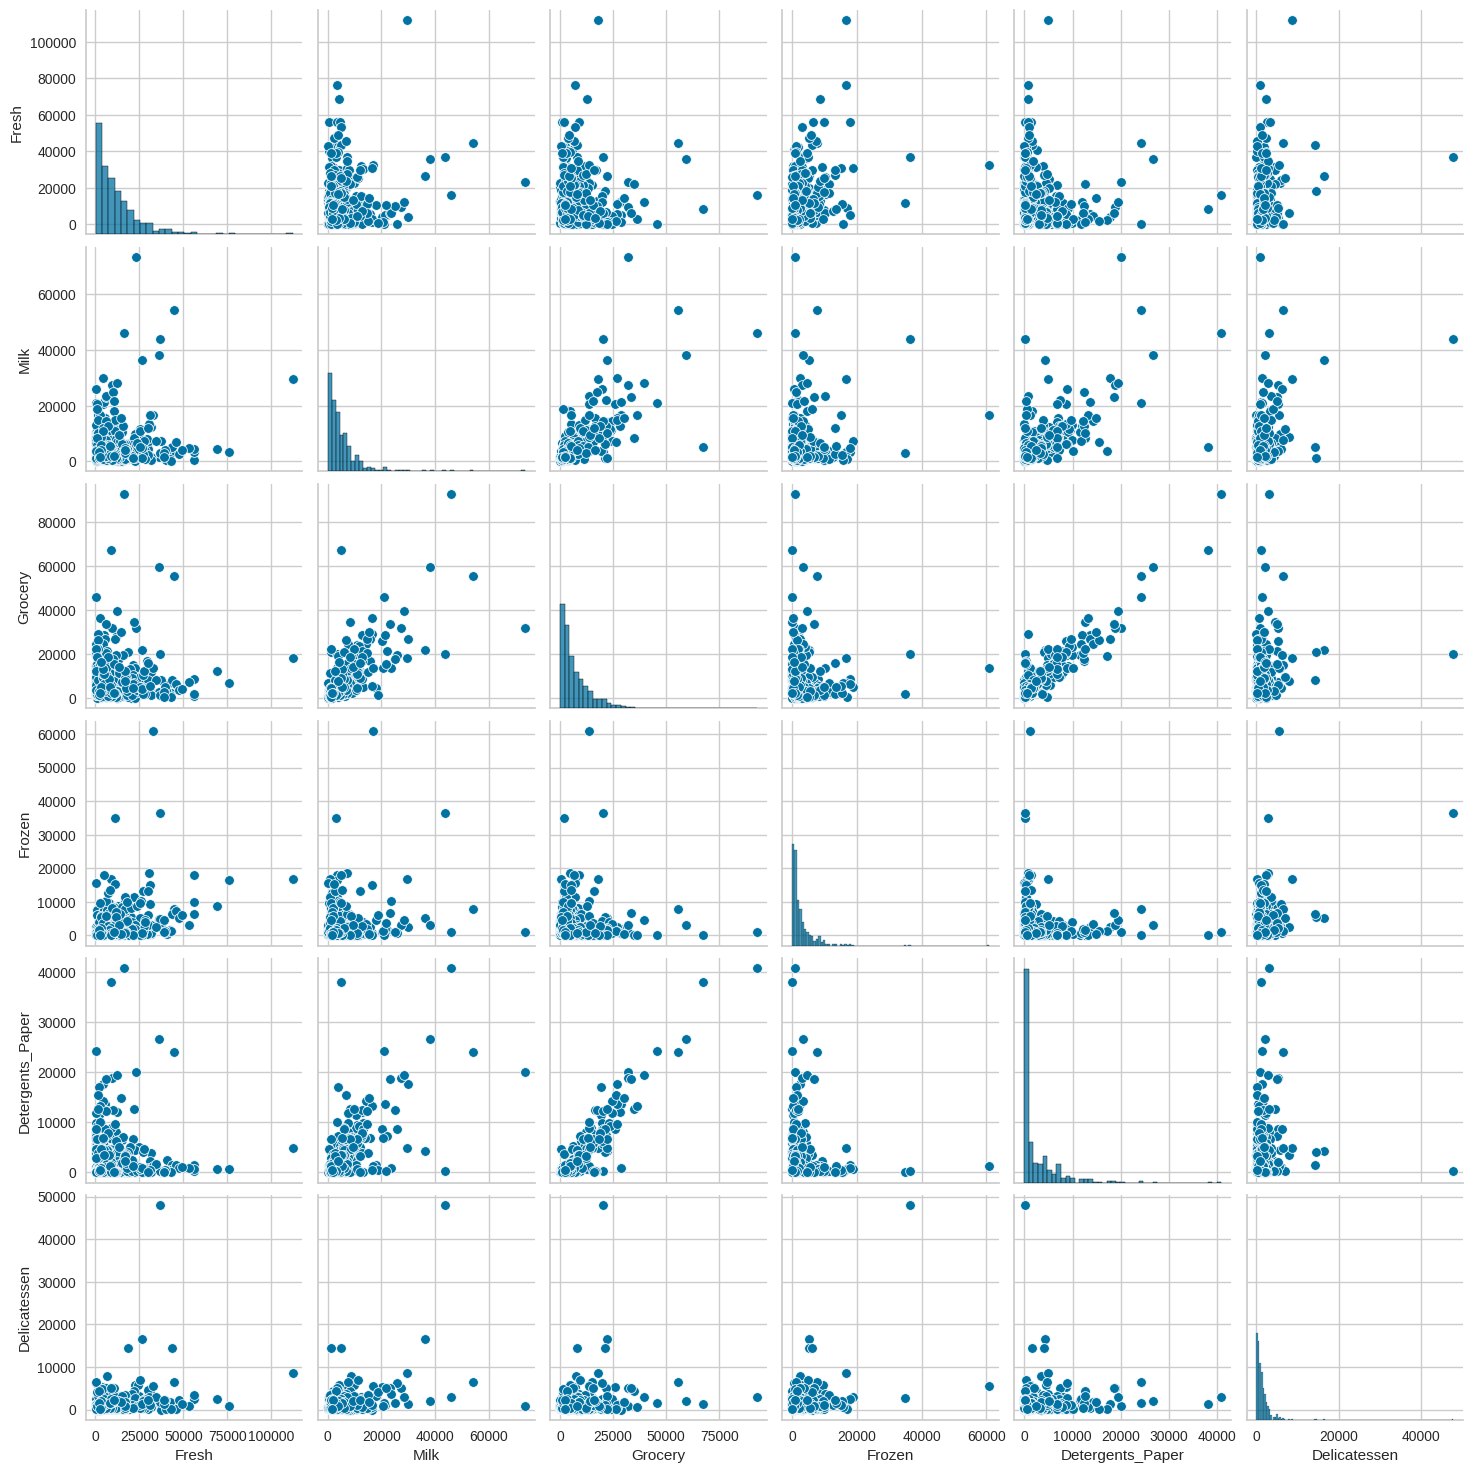

In [28]:
sns.pairplot(df)

# Analyse en Composante Principale (ACP)

In [30]:
df.head(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776


In [31]:
data = df.drop(['Channel', 'Region'], axis=1)
data.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776


In [39]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
type(data)

numpy.ndarray

In [40]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [41]:
np.save('training_data.npy', data)

In [42]:
pca = PCA(n_components = 2)
res_pca = pca.fit_transform(data)
type(res_pca)

numpy.ndarray

In [43]:
res_pca

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

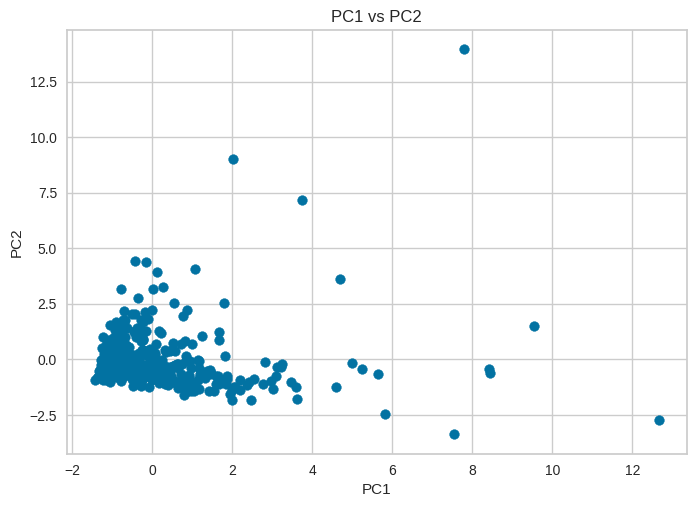

In [44]:
plt.scatter(res_pca[:, 0], res_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

In [46]:
pearsonr(res_pca[:, 0], res_pca[:, 1])[0]

-2.940356291780688e-16

**ACP non linéaire**

In [47]:
data = np.load('training_data.npy')

In [48]:
kpca = KernelPCA(n_components=2, kernel='rbf')
res_kpca = kpca.fit_transform(data)
type(res_kpca)

numpy.ndarray

In [49]:
res_kpca

array([[ 7.83737059e-02, -1.73114604e-01],
       [ 1.85812546e-01, -3.07414714e-01],
       [ 3.41701538e-01,  7.50477517e-02],
       [-2.53303524e-01,  2.50352426e-01],
       [ 1.36616714e-01,  3.75279235e-01],
       [-8.89533043e-02, -2.12264712e-01],
       [-1.43530413e-01, -1.66305893e-01],
       [ 4.08969858e-02, -2.62715599e-01],
       [-2.20484030e-01, -3.05157788e-01],
       [ 7.08968837e-01, -2.91192502e-01],
       [ 3.19740641e-01, -3.06524578e-01],
       [-3.55451826e-01,  1.38748032e-02],
       [ 3.85446545e-01,  3.35728837e-01],
       [ 3.89500601e-01,  5.93738133e-02],
       [ 3.55511167e-01,  1.44217785e-01],
       [-3.54355200e-01, -1.10218594e-01],
       [ 3.22635645e-01, -4.72218998e-01],
       [-7.00024990e-02, -9.03504726e-02],
       [ 1.16541919e-01,  1.17853125e-01],
       [-1.20227554e-01, -2.83548201e-01],
       [-1.46900211e-01,  9.95711390e-02],
       [-3.99510714e-01, -9.26408202e-02],
       [ 2.04359988e-01,  6.35635926e-01],
       [ 3.

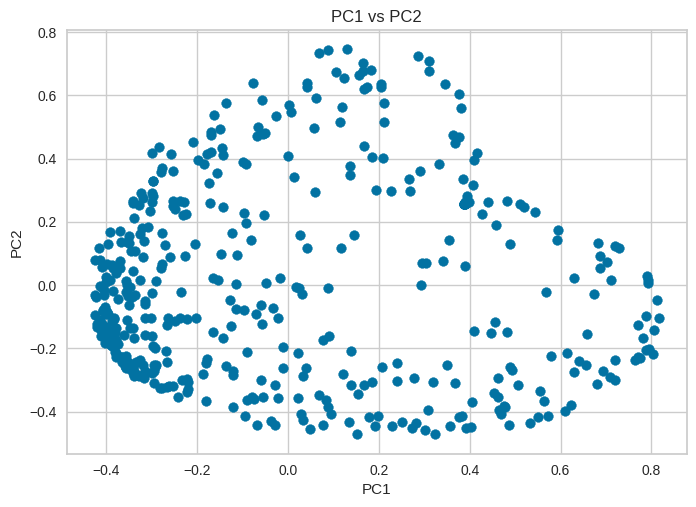

In [51]:
plt.scatter(res_kpca[:, 0], res_kpca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

In [52]:
pearsonr(res_kpca[:, 0], res_kpca[:, 1])[0]

5.5294310796760726e-17

In [53]:
pearsonr(res_kpca[:, 0], res_kpca[:, 1])[0] < pearsonr(res_pca[:, 0], res_pca[:, 1])[0]

False

In [54]:
df['x_kpca'] = res_kpca[:, 0]
df['y_kpca'] = res_kpca[:, 1]

In [55]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca,y_kpca
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279


# Clustering

In [56]:
cluster_model = KMeans(n_clusters=5)
cluster_model.fit(res_kpca)
clusters = cluster_model.predict(res_kpca)

In [57]:
clusters

array([2, 2, 0, 3, 0, 1, 1, 2, 1, 4, 2, 1, 0, 4, 0, 1, 2, 1, 0, 1, 3, 1,
       0, 0, 0, 1, 1, 1, 4, 0, 3, 1, 3, 0, 1, 2, 0, 4, 4, 0, 0, 3, 4, 4,
       2, 4, 4, 0, 2, 4, 1, 1, 0, 2, 3, 1, 0, 4, 1, 2, 2, 0, 2, 4, 1, 0,
       2, 2, 1, 1, 3, 0, 3, 3, 2, 3, 1, 4, 1, 1, 1, 4, 2, 3, 1, 0, 0, 0,
       3, 3, 1, 3, 0, 0, 2, 1, 2, 1, 1, 3, 4, 4, 2, 0, 1, 3, 2, 4, 2, 4,
       1, 4, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 2, 0, 0, 3, 0, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 0, 3, 3, 4, 1, 1, 1, 3, 3, 1, 3, 1,
       1, 4, 4, 3, 2, 4, 2, 1, 3, 4, 2, 4, 2, 1, 1, 1, 4, 4, 2, 4, 1, 2,
       0, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 2, 3, 1, 1, 4, 1, 3, 0, 2,
       1, 1, 4, 4, 0, 1, 1, 4, 1, 2, 2, 4, 3, 0, 1, 2, 2, 4, 4, 3, 4, 1,
       3, 2, 3, 1, 1, 1, 3, 1, 1, 3, 3, 2, 3, 1, 3, 1, 1, 3, 1, 0, 0, 3,
       3, 1, 2, 4, 1, 3, 1, 1, 1, 0, 3, 0, 0, 3, 1, 1, 0, 0, 1, 3, 3, 1,
       4, 0, 4, 3, 4, 3, 1, 1, 2, 0, 1, 1, 0, 0, 3, 2, 1, 1, 0, 0, 0, 0,
       1, 3, 3, 0, 1, 1, 1, 4, 3, 1, 3, 1, 2, 1, 1,

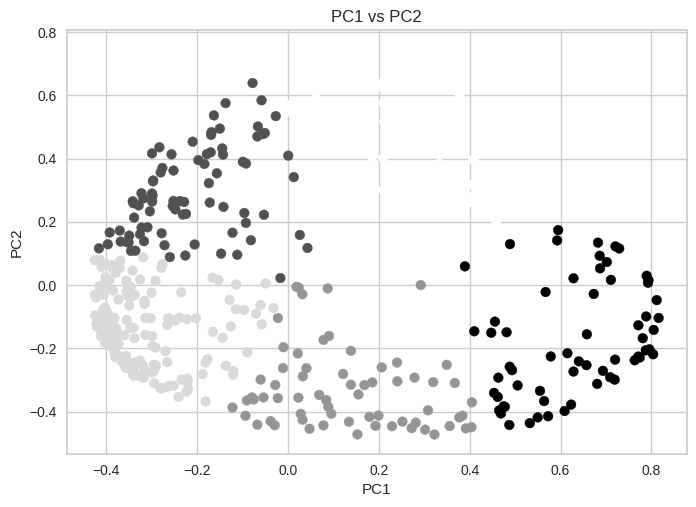

In [58]:
plt.scatter(res_kpca[:, 0], res_kpca[:, 1], c = clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2')
plt.show()

In [59]:
!pip install -U yellowbrick

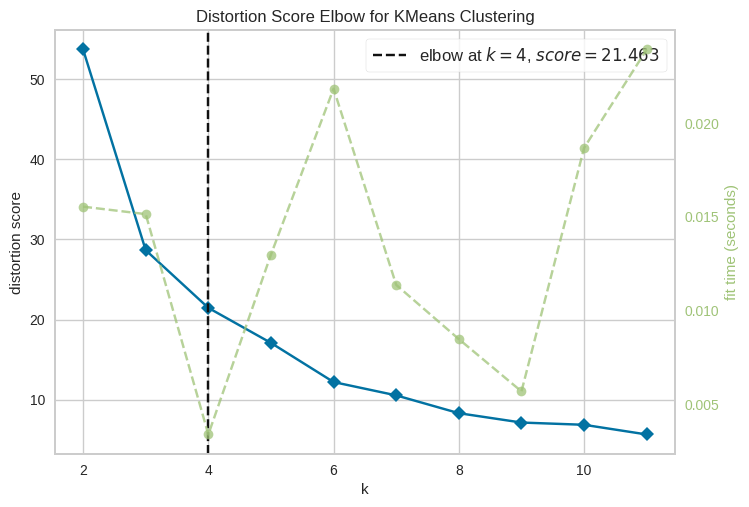

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(res_kpca)
visualizer.show()

In [61]:
df['cluster_kpca'] = clusters
df.to_csv('cluster_data.csv')

In [62]:
df = pd.read_csv('cluster_data.csv', index_col = 0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,x_kpca,y_kpca,cluster_kpca
0,Retail,Other,12669,9656,7561,214,2674,1338,0.078374,-0.173115,2
1,Retail,Other,7057,9810,9568,1762,3293,1776,0.185813,-0.307415,2
2,Retail,Other,6353,8808,7684,2405,3516,7844,0.341702,0.075048,0
3,HoReCa,Other,13265,1196,4221,6404,507,1788,-0.253304,0.250352,3
4,Retail,Other,22615,5410,7198,3915,1777,5185,0.136617,0.375279,0


In [63]:
df['cluster_kpca'].unique()

array([2, 0, 3, 1, 4])

In [64]:
features

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [66]:
numerical_features = [f for f in features if f not in ['Channel', 'Region']]

df.groupby('cluster_kpca')[numerical_features].mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
cluster_kpca,,,,,,
0,29583.671233,11270.945205,12885.630137,7836.178082,4528.547945,3681.082192
1,6538.062893,2390.238994,2977.622642,1705.238994,693.496855,844.452830
2,5010.815385,6713.061538,9540.538462,1217.676923,3856.338462,1197.492308
3,17569.506173,2351.679012,3157.061728,4259.222222,554.802469,1123.481481
4,5357.064516,11624.112903,19493.741935,1360.161290,8571.064516,1598.661290


In [68]:
df.groupby(['cluster_kpca', 'Channel', 'Region'])[numerical_features].mean()

Fresh          Milk       Grocery  \
cluster_kpca Channel Region                                             
0            HoReCa  Lisbon  31168.666667   9313.333333   7786.666667   
                     Other   34887.564103   6569.153846   5962.948718   
                     Porto   16360.000000   8558.500000  10323.500000   
             Retail  Lisbon   9126.500000  25729.500000  36640.000000   
                     Other   23057.333333  22303.388889  25736.555556   
                     Porto   17490.000000   4241.666667  26943.666667   
1            HoReCa  Lisbon   6580.461538   2444.615385   2693.269231   
                     Other    6021.242991   2297.859813   2595.775701   
                     Porto    7070.600000   1708.266667   4009.933333   
             Retail  Lisbon   2790.000000   2527.000000   5265.000000   
                     Other   11887.428571   4446.714286   5953.571429   
                     Porto   10708.666667   3779.666667   6193.333333   
2            HoReCa  Lisbon   3218.333333   7438.166667   7476.500000   
                     Other    3332.312500   5690.250000   8992.187500   
             Retail  Lisbon   2443.333333   6128.333333   9281.333333   
                     Other    6374.567568   7013.243243  10133.918919   
                     Porto    3295.666667   7600.333333   9534.000000   
3            HoReCa  Lisbon  16912.176471   1504.000000   2178.823529   
                     Other   18005.255319   2370.978723   2898.021277   
                     Porto   17039.636364   1979.818182   3843.454545   
             Retail  Lisbon  15927.000000   5955.000000   7413.500000   
                     Other   17521.500000   4948.500000   6342.500000   
4            HoReCa  Lisbon   2806.000000  10765.000000  15538.000000   
                     Other   11908.500000  15602.500000  14858.000000   
             Retail  Lisbon   3337.300000  10983.100000  21127.900000   
                     Other    5849.205128  11311.128205  19740.820513   
                     Porto    4402.300000  12776.000000  18218.700000   

                                   Frozen  Detergents_Paper  Delicatessen  
cluster_kpca Channel Region                                                
0            HoReCa  Lisbon   7238.666667        739.444444   2997.555556  
                     Other    9338.282051        859.282051   3836.794872  
                     Porto   38235.000000        643.500000   3079.500000  
             Retail  Lisbon   5741.000000      19002.000000   3995.500000  
                     Other    2316.277778      11587.833333   3950.888889  
                     Porto    4351.666667      14181.666667   2280.000000  
1            HoReCa  Lisbon   1858.769231        860.153846    621.769231  
                     Other    1663.766355        499.775701    908.700935  
                     Porto    1986.000000        444.933333    775.200000  
             Retail  Lisbon   5612.000000        788.000000   1360.000000  
                     Other     954.857143       2626.000000    727.571429  
                     Porto     898.666667       2860.666667    930.000000  
2            HoReCa  Lisbon   1071.666667       2718.500000    960.000000  
                     Other    1080.687500       3090.312500   1139.812500  
             Retail  Lisbon   1662.000000       5195.666667    793.000000  
                     Other    1306.621622       4179.351351   1342.108108  
                     Porto     699.000000       4894.333333    601.000000  
3            HoReCa  Lisbon   3719.529412        289.588235   1137.647059  
                     Other    4368.574468        514.808511   1026.404255  
                     Porto    4963.727273        505.000000   1198.000000  
             Retail  Lisbon   5040.000000       1761.500000   1845.000000  
                     Other    2940.250000       1685.500000   1638.250000  
4            HoReCa  Lisbon   1374.000000       5828.000000   2388.000000  
                  

In [70]:
df.groupby(['cluster_kpca', 'Region'])[numerical_features].mean()

Fresh          Milk       Grocery        Frozen  \
cluster_kpca Region                                                           
0            Lisbon  27161.000000  12298.090909  13032.727273   6966.363636   
             Other   31151.701754  11537.859649  12207.245614   7120.807018   
             Porto   17038.000000   5968.400000  20295.600000  17905.000000   
1            Lisbon   6440.074074   2447.666667   2788.518519   1997.777778   
             Other    6381.447368   2429.807018   2801.956140   1620.236842   
             Porto    7676.944444   2053.500000   4373.833333   1804.777778   
2            Lisbon   2960.000000   7001.555556   8078.111111   1268.444444   
             Other    5456.150943   6613.849057   9789.245283   1238.415094   
             Porto    3295.666667   7600.333333   9534.000000    699.000000   
3            Lisbon  16808.473684   1972.526316   2729.842105   3858.526316   
             Other   17967.313725   2573.137255   3168.176471   4256.549020   
             Porto   17039.636364   1979.818182   3843.454545   4963.727273   
4            Lisbon   3289.000000  10963.272727  20619.727273   1429.818182   
             Other    6144.780488  11520.463415  19502.634146   1394.609756   
             Porto    4402.300000  12776.000000  18218.700000   1142.300000   

                     Detergents_Paper  Delicatessen  
cluster_kpca Region                                  
0            Lisbon       4059.909091   3179.000000  
             Other        4247.245614   3872.824561  
             Porto        8766.400000   2599.800000  
1            Lisbon        857.481481    649.111111  
             Other         630.333333    897.578947  
             Porto         847.555556    801.000000  
2            Lisbon       3544.222222    904.333333  
             Other        3850.584906   1281.037736  
             Porto        4894.333333    601.000000  
3            Lisbon        444.526316   1212.105263  
             Other         606.627451   1074.392157  
             Porto         505.000000   1198.000000  
4            Lisbon       8725.545455   1878.454545  
             Other        8327.804878   1618.195122  
             Porto        9398.500000   1210.800000